## **LUNG CANCER PREDICTION**

```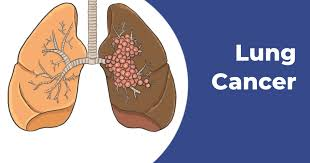
# This is formatted as code
```



BACKGROUND

Lung cancer is one of the leading causes of cancer-related mortalities worlwide.Individuals across the socio-economic strata may be exposed to risk factors.  Putative risk factors of lung cancer include smoking, exposure to environmental pollution etc. However, it is important for us to identify key features (risk factors) with the most accurate effect{s} on lung cancer etiology.

RATIONALE

This project will develop a predictive model for lung cancer risk assessment using a comprehensive dataset of lung cancer outcomes.

FEATURES

 Gender Influence: To what extent does gender impact the likelihood of developing lung cancer, and are there notable gender-based disparities? (M/F)

 Age-Related Risk: How does age factor into the risk of lung cancer, and is there a particular age group more vulnerable? (continuous variable)

 Smoking History: How does a history of smoking relate to the risk of lung cancer, and is there a straightforward connection? (Yes=2/No=1)

 Yellow Fingers: Does the presence of yellow fingers, possibly due to nicotine staining, correlate with an elevated risk of lung cancer? (Yes=2/No=1)

 Anxiety Impact: Is there a connection between anxiety levels and the likelihood of developing lung cancer?(Yes=2/No=1)

 Peer Pressure Influence: How does exposure to peer pressure, especially related to smoking, affect the risk of lung cancer?(Yes=2/No=1)

 Chronic Diseases: Are individuals with chronic diseases at a higher risk of developing lung cancer?(Yes=2/No=1)

 Fatigue and Risk: Does chronic fatigue or tiredness play a role in lung cancer risk?(Yes=2/No=1)

 Allergies and Susceptibility: Is there a correlation between allergies and an increased risk of lung cancer?(Yes=2/No=1)

 Wheezing Connection: How strong is the association between wheezing and the likelihood of developing lung cancer?(Yes=2/No=1)

 Alcohol Impact: Do patterns of alcohol consumption influence lung cancer risk?(Yes=2/No=1)

 Coughing and Risk: Is there a significant relationship between chronic coughing and lung cancer risk?(Yes=2/No=1)

 Respiratory and Swallowing Factors: "How do symptoms like shortness of breath and difficulty in swallowing relate to the risk of lung cancer?"
    
    #### Shortness of breath (Yes=2/No=1)
    #### Swallowing difficulty (Yes=2/No=1)

 Assessing Chest Pain :How is chest pain related to the risk of developing lung cancer? (Yes=2/No=1)

PART 1: LIBRARY INSTALLATION & IMPORTATION

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pickle
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA  # to apply PCA
#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer patient data sets.csv to cancer patient data sets.csv


PART 2: EDA

In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['cancer patient data sets.csv']))

In [ ]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


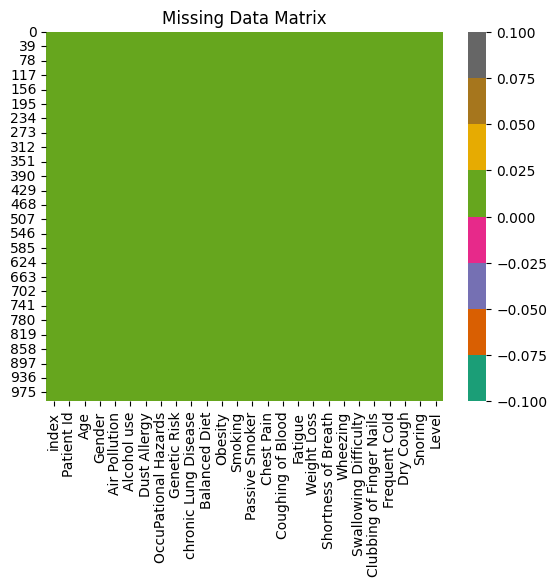

In [ ]:
sns.heatmap(data.isnull(), cmap = 'Dark2')
plt.title("Missing Data Matrix")
images_dir = '/content/gdrive/My Drive/Images_for_Lung_Cancer_Pred.'
plt.savefig(f"{images_dir}/null_visualization.jpeg")

There are no null values in the dataset. This is good. Now let's look at the variables we are working with, drop duplicates

In [ ]:
#Check and drop duplicate rows
data.drop_duplicates(inplace=True)
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#We need to drop columns "Index" and "Patient_ID"
data.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
 data.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [ ]:
#Let's look at the distribution of the dataset
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
#Let's examine the target variable "Level"
data.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

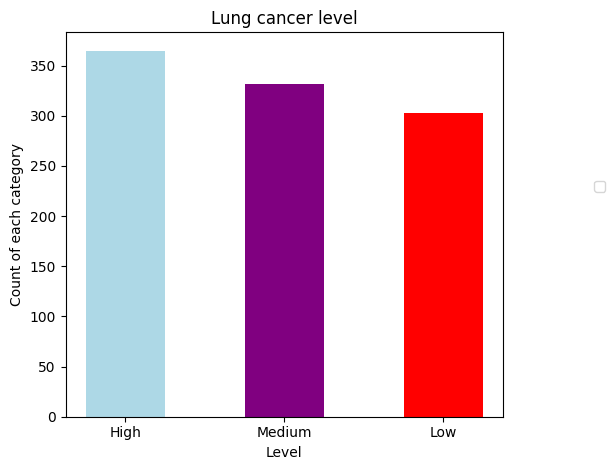

In [ ]:
color = ['lightblue', 'purple', 'red']
value_counts = data['Level'].value_counts()
plt.bar(value_counts.index, value_counts.values, width = 0.5, color=color)
plt.xlabel('Level')
plt.ylabel('Count of each category')
plt.title('Lung cancer level')
plt.legend(bbox_to_anchor = (1.25, 0.6), loc ="center right")
plt.tight_layout()
data['Level'].value_counts()
images_dir = '/content/gdrive/My Drive/Images_for_Lung_Cancer_Pred.'
plt.savefig(f"{images_dir}/Lung cancer risk category1.jpeg")

In [ ]:
#Let's recode the values in the target column
data['Level'].replace(to_replace = 'Low', value = 0, inplace = True)
data['Level'].replace(to_replace = 'Medium', value = 1, inplace = True)
data['Level'].replace(to_replace = 'High', value = 2, inplace = True)

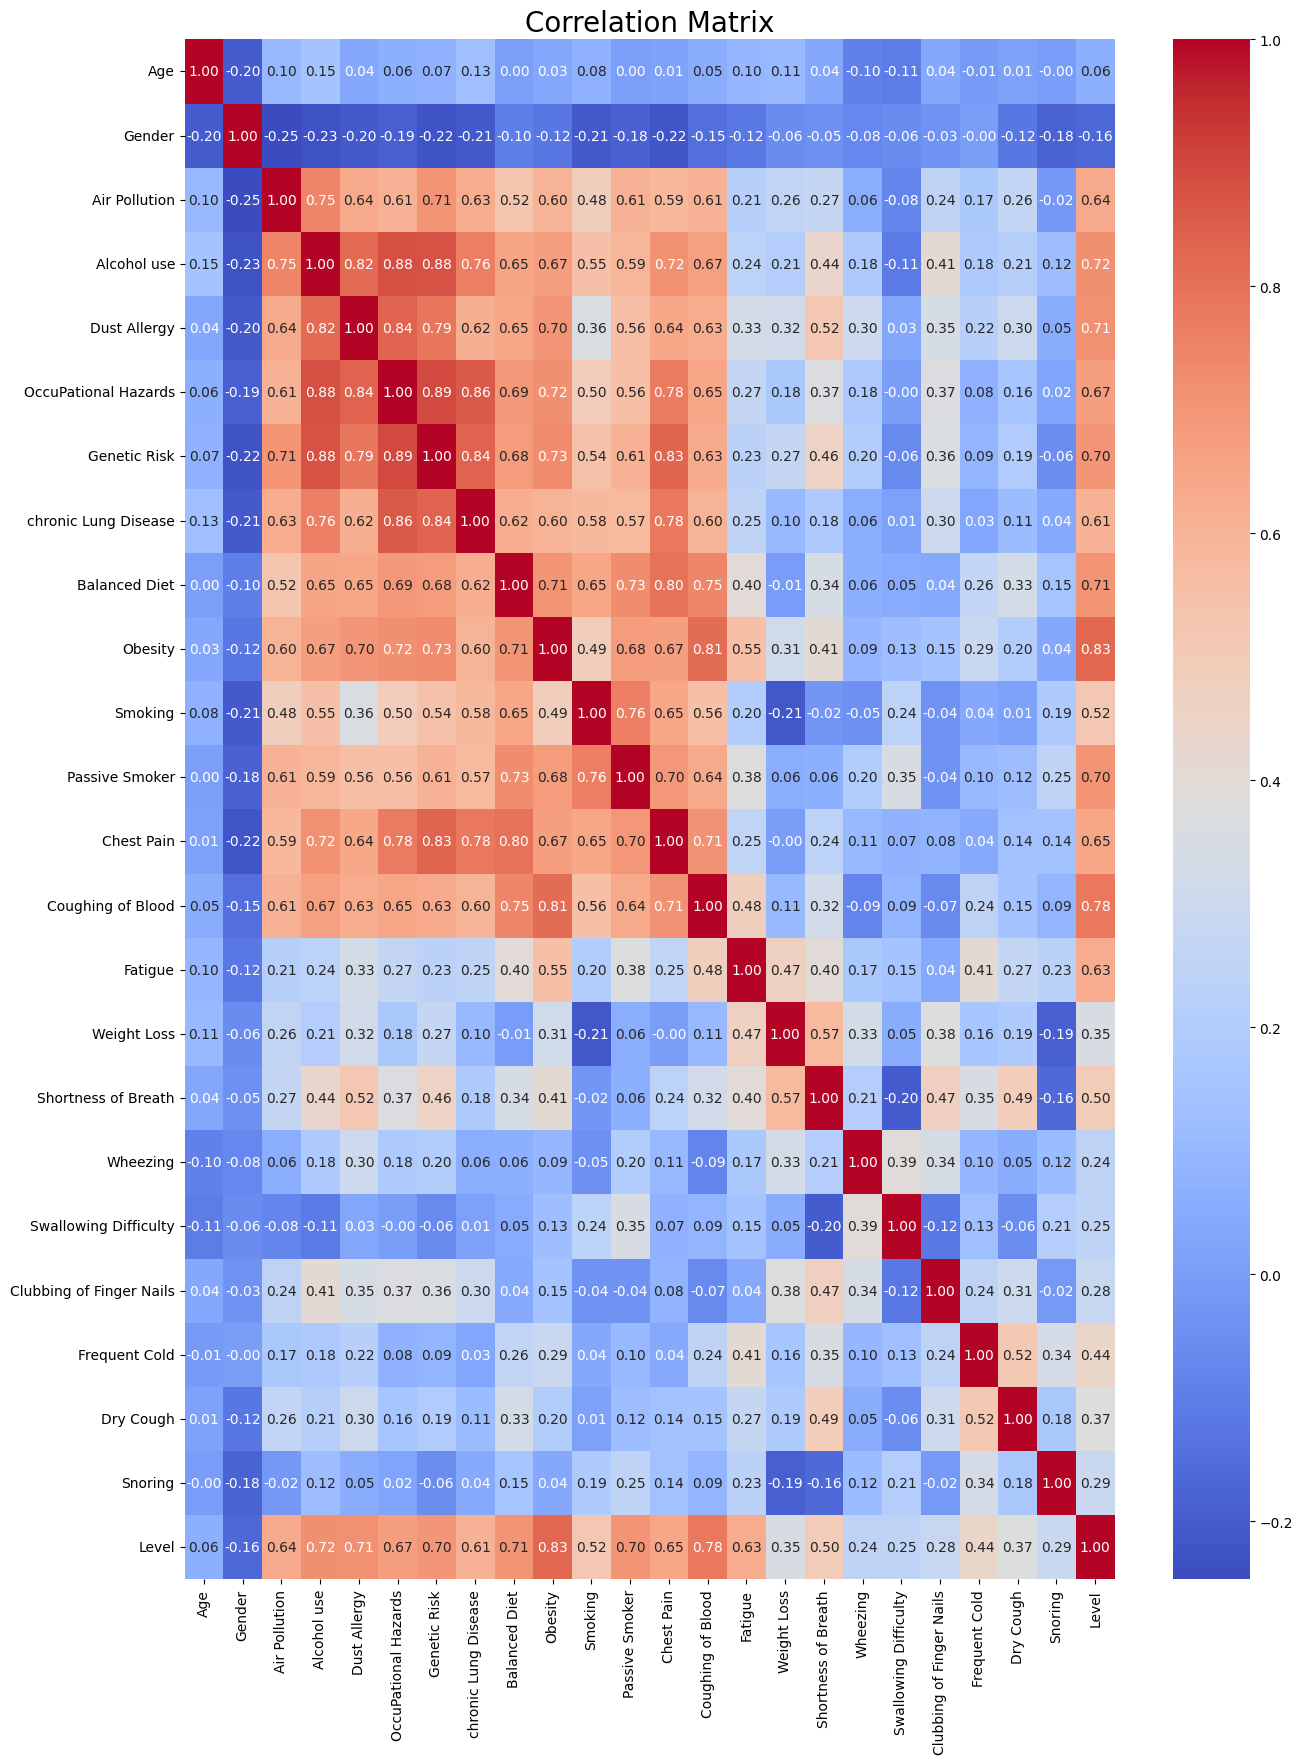

In [ ]:
# Heatmap for correlation between variables
f, ax = plt.subplots(figsize= [15,20])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "coolwarm" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.savefig(f"{images_dir}/correlation_matrix.jpeg")

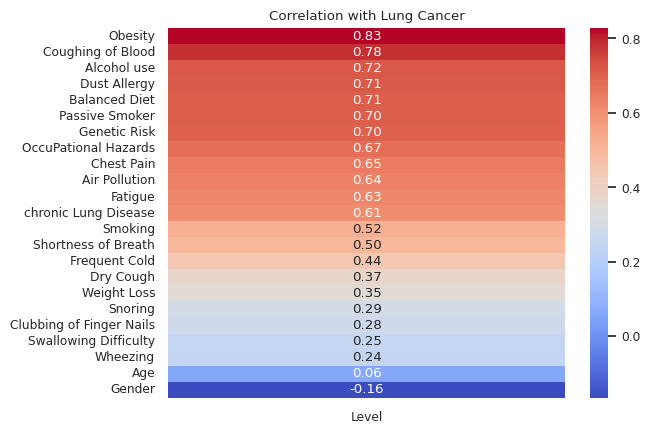

In [ ]:
# Sort correlation values in descending order
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['Level'].drop('Level')
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Lung Cancer')
plt.savefig(f"{images_dir}/correlation of variables.jpeg")

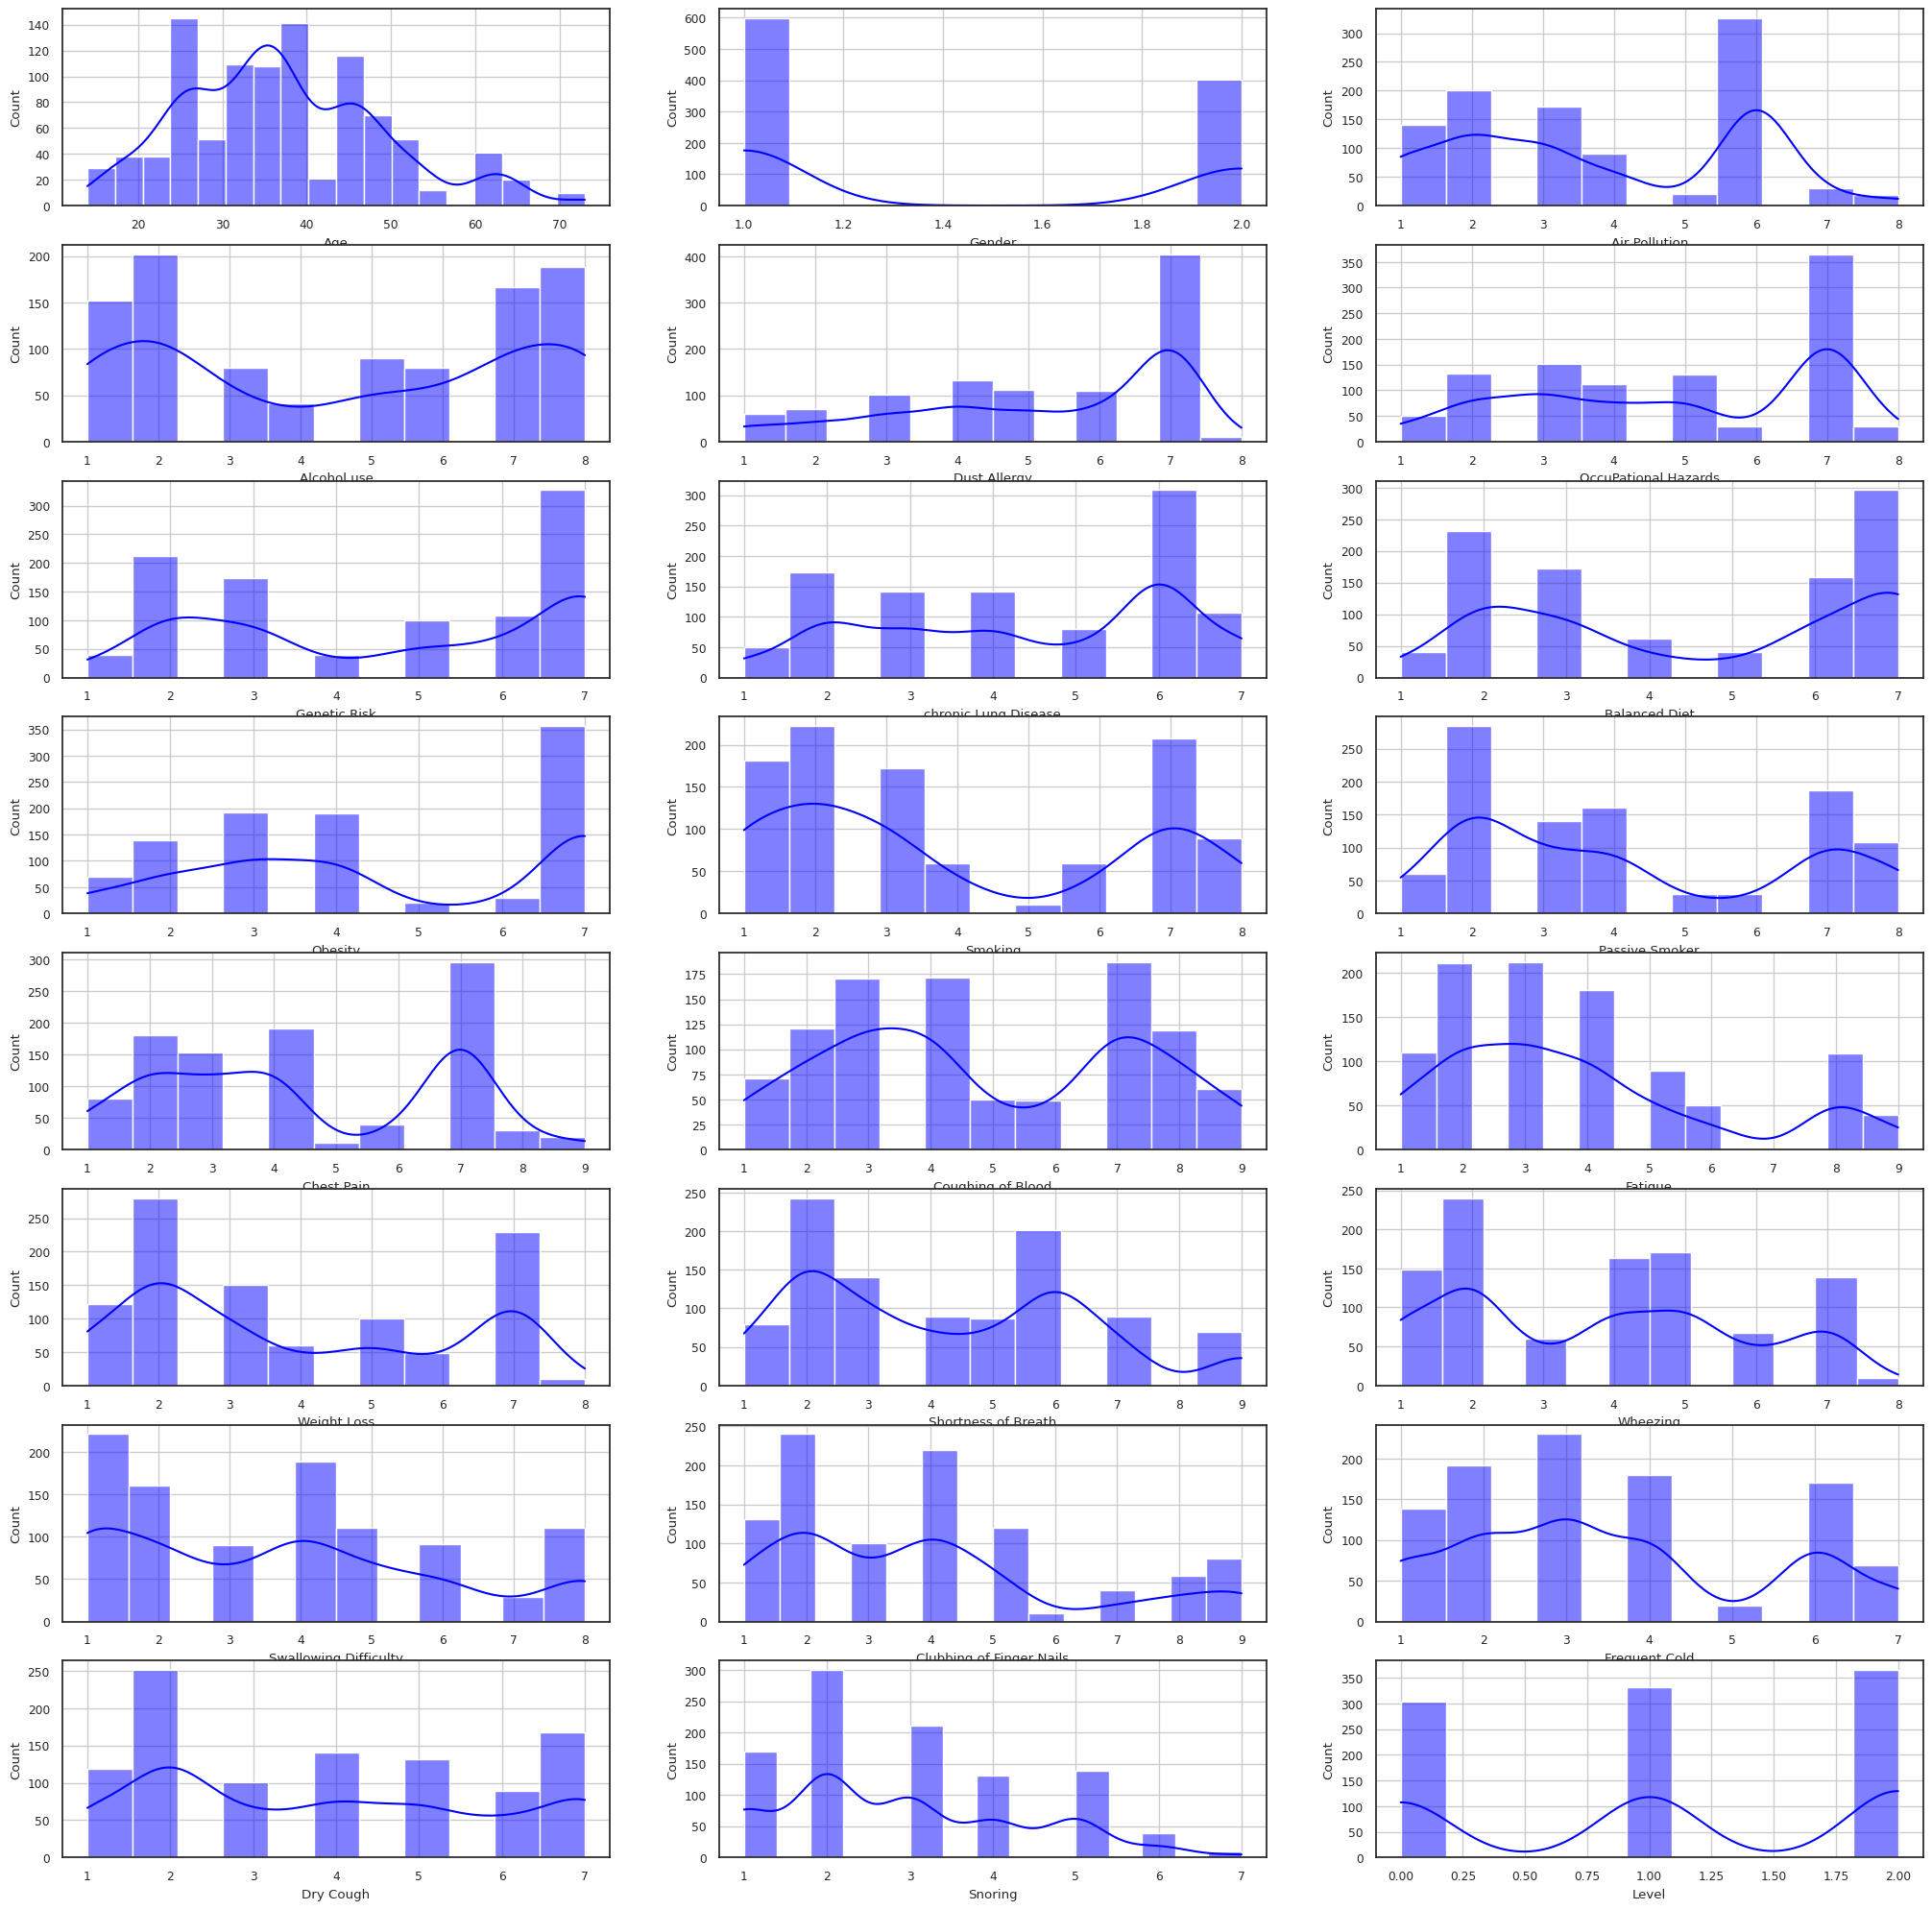

In [ ]:
  #Let's look at univariate (value) distribution
plt.figure(figsize = (25, 25))

for i in range(24):
    plt.subplot(8, 3, i+1)
    sns.histplot(data.iloc[:, i], color = 'blue', kde=True)
    plt.grid()
plt.savefig(f"{images_dir}/value_distribution.jpeg")

In [ ]:
# Detect and print number of outliers for each feature
for feature in data:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Age yes
Gender no
Air Pollution no
Alcohol use no
Dust Allergy no
OccuPational Hazards no
Genetic Risk no
chronic Lung Disease no
Balanced Diet no
Obesity no
Smoking no
Passive Smoker no
Chest Pain no
Coughing of Blood no
Fatigue no
Weight Loss no
Shortness of Breath no
Wheezing no
Swallowing Difficulty no
Clubbing of Finger Nails no
Frequent Cold no
Dry Cough no
Snoring no
Level no


In [ ]:
#Handle outliers
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

# Handle outliers for each feature
for column in data.columns:
    handle_outliers(data, column)

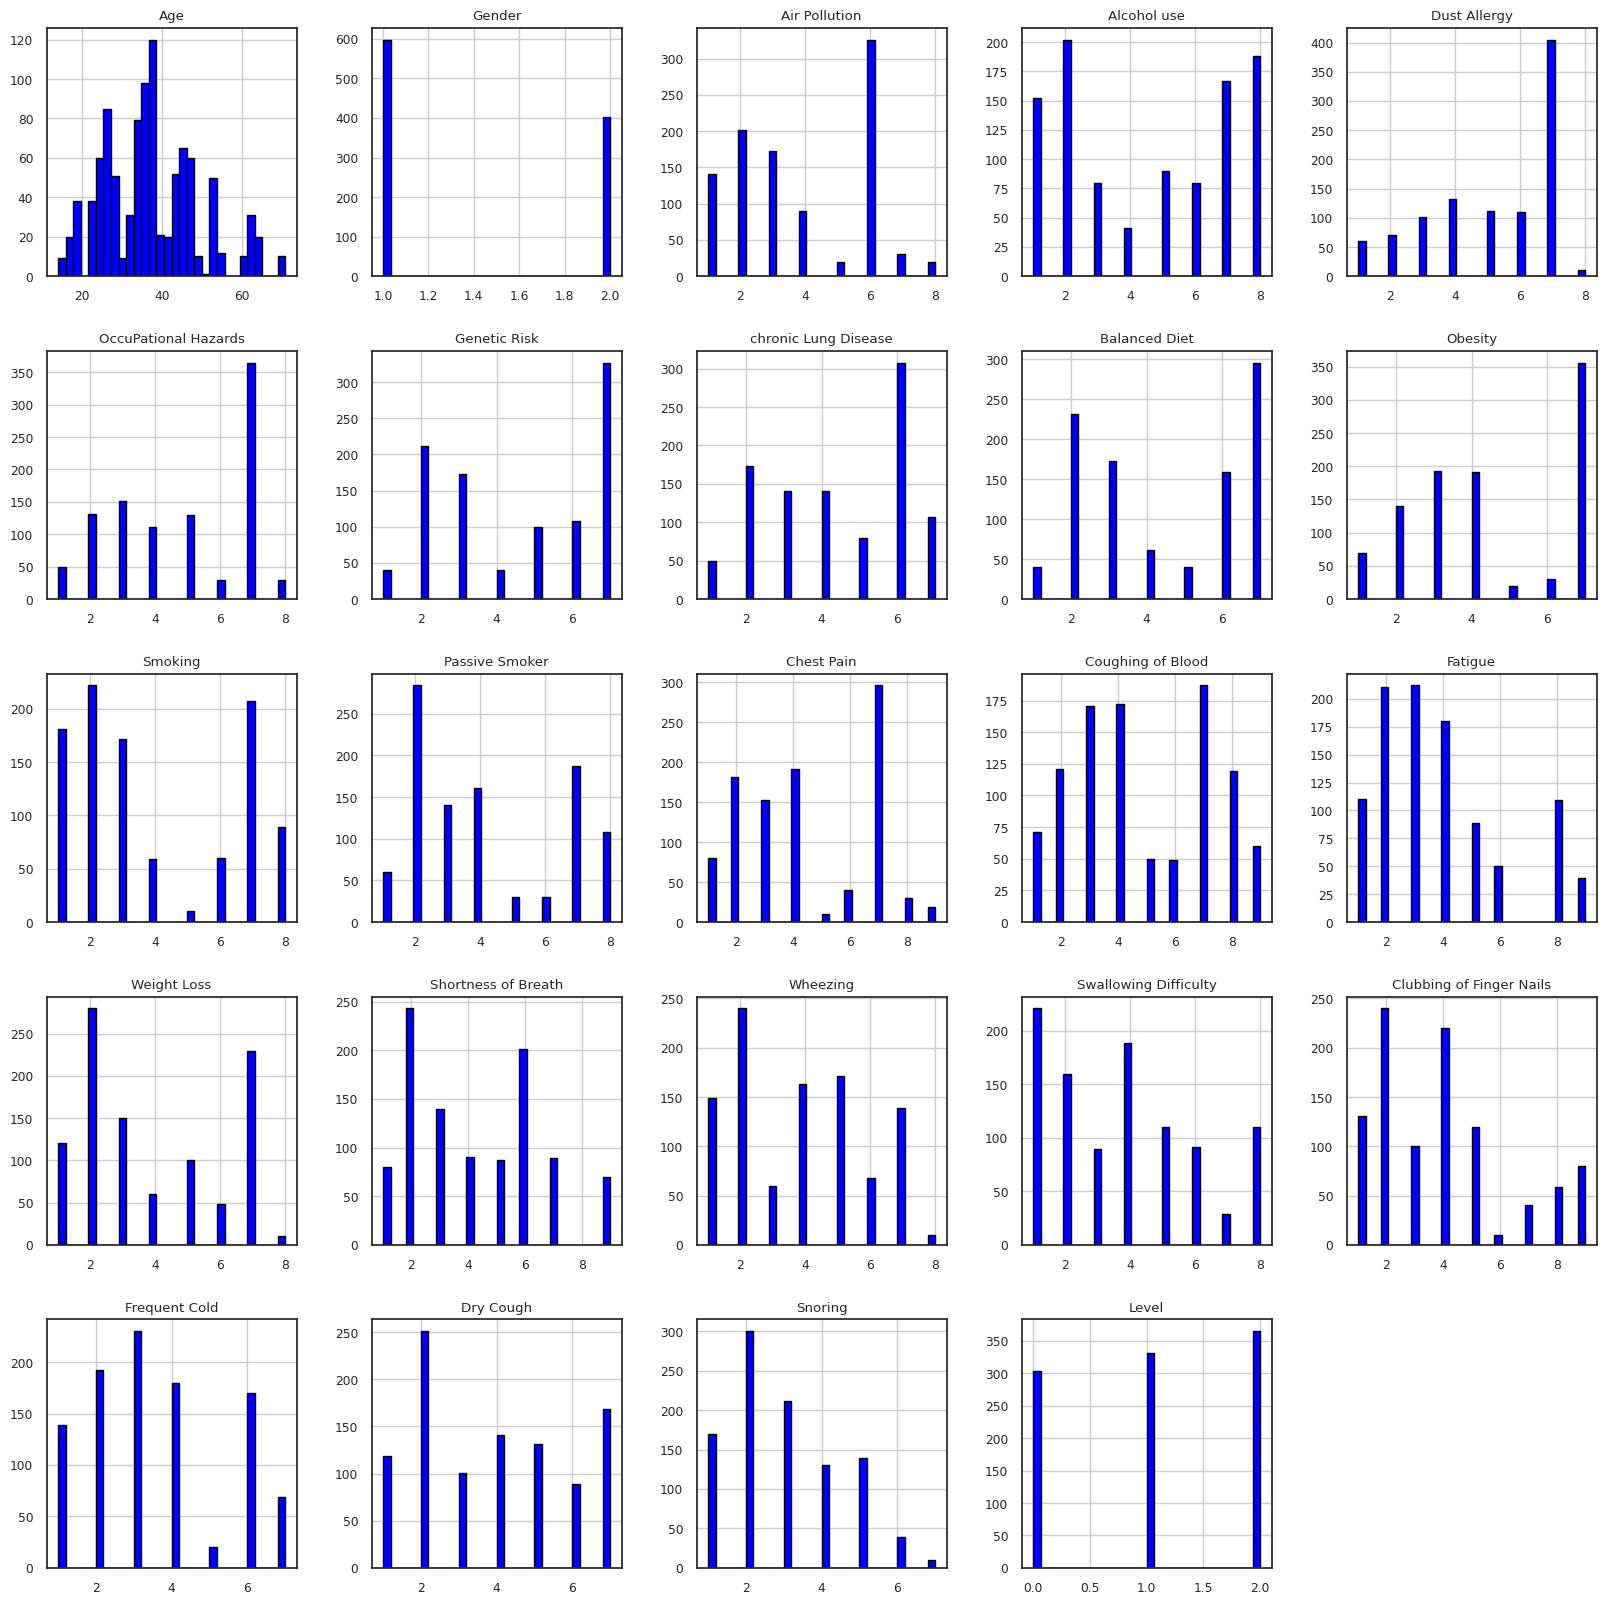

In [ ]:
#Now the data looks more like a normal distribution

data.hist(figsize=(20,20),bins=30, color='blue', edgecolor='black')
plt.savefig(f"{images_dir}/Normalized_value_distribution.jpeg")

In [ ]:
# Reconfirm outliers

def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in data.columns:
    outliers = detect_outliers(data, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Age: 0
Number of outliers in Gender: 0
Number of outliers in Air Pollution: 0
Number of outliers in Alcohol use: 0
Number of outliers in Dust Allergy: 0
Number of outliers in OccuPational Hazards: 0
Number of outliers in Genetic Risk: 0
Number of outliers in chronic Lung Disease: 0
Number of outliers in Balanced Diet: 0
Number of outliers in Obesity: 0
Number of outliers in Smoking: 0
Number of outliers in Passive Smoker: 0
Number of outliers in Chest Pain: 0
Number of outliers in Coughing of Blood: 0
Number of outliers in Fatigue: 0
Number of outliers in Weight Loss: 0
Number of outliers in Shortness of Breath: 0
Number of outliers in Wheezing: 0
Number of outliers in Swallowing Difficulty: 0
Number of outliers in Clubbing of Finger Nails: 0
Number of outliers in Frequent Cold: 0
Number of outliers in Dry Cough: 0
Number of outliers in Snoring: 0
Number of outliers in Level: 0


No more outliers

PART 3: TRAINING MACHINE LEARNING MODELS

In [ ]:
x = data.drop('Level', axis=1)
y = data['Level']

In [ ]:
x

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33.0,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17.0,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35.0,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37.0,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46.0,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44.0,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37.0,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25.0,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18.0,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [ ]:
#Split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=7)
# Printing the size of the training and testing dataset
print("The size of the training dataset: ", X_train.size)
print("The size of the testing dataset: ", X_test.size)

The size of the training dataset:  18400
The size of the testing dataset:  4600


This code is used to split the data into training and test sets for a machine learning model.

First, the code separates the features (x) and target (y) variables from the original dataset bank_data using the drop() method.

The drop() method is used to remove a specified column from the dataset. • In this case, the column 'y' is removed from the dataset and assigned to the variable x.

The column 'y' is assigned to the variable y.

Next, the train_test_split() function from the scikit-learn library is used to split the data into training and test sets.

The function takes four arguments: the scaled features (X), the target (y), the test size (0.2 in this case), and a random state (which is not specified in this code).

The test size argument specifies the proportion of the data that should be used for testing the model.

In this case, 20% of the data is used for testing and 80% is used for training.

The function returns four variables: X_train, X_test, y_train, and y_test. These variables contain the training and test sets for the features and target variables. • The training sets are used to train the machine learning model, and the test sets are used to evaluate the performance of the model.

In [ ]:
#Function of measure performance
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

## Random Forest

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

This code creates an instance of the RandomForestClassifier class and assigns it to the variable model_rf.

Then, it fits the model to the training data X_train and y_train using the fit() method.

The RandomForestClassifier is a machine learning algorithm that creates a forest of decision trees and combines their predictions to make a final prediction.

The fit() method trains the model on the input data by adjusting the parameters of the decision trees to minimize the error between the predicted and actual values.

Overall, this code trains a random forest classifier on the training data X_train and y_train.

In [ ]:
y_pred_rf = model_rf.predict(X_test)

This code uses the predict method of a RandomForestClassifier object (rf) to make predictions on a set of test data (X_test).

The predicted values are then stored in the variable y_pred_rf. This is a common step in machine learning workflows, where the model is trained on a set of training data and then used to make predictions on new, unseen data.

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[59  0  0]
 [ 0 61  0]
 [ 0  0 80]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

RF-Confusion Matrix


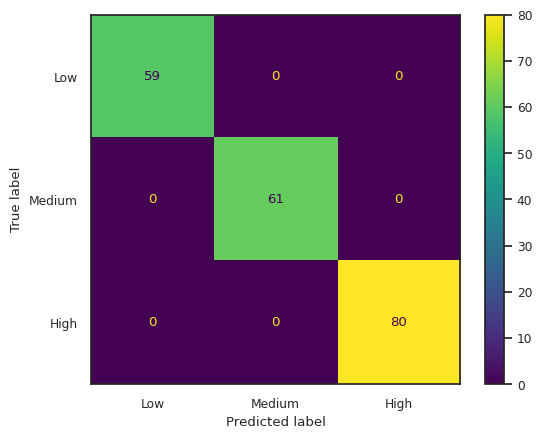

In [ ]:
perform(y_pred_rf)
plt.savefig(f"{images_dir}/RandomForestClassifier.jpeg")
print("RF-Confusion Matrix")

Confusion matrix plots what the model predicted against what the correct prediction was. We used this to understand the tradeoff between false positives (top right) and false negatives(bottom left).

The confusion_matrix() function is called with y_test and y_pred as arguments to create a confusion matrix. The confusion matrix is a table that shows the number of true positives, true negatives, false positives, and false negatives for a classification model. The plot provides a visual representation of the model's performance in terms of correctly and incorrectly classified instances.

This looks like a good model

In [ ]:
filename = 'Lung_Cancer_RF.h5'
pickle.dump(model_rf, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


## ADABoost Classifier

In [ ]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
 y_pred_ada = model_ada.predict(X_test)

Precision :  0.705
Recall :  0.705
Accuracy :  0.705
F1 Score :  0.705

 [[ 0 59  0]
 [ 0 61  0]
 [ 0  0 80]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.51      1.00      0.67        61
           2       1.00      1.00      1.00        80

    accuracy                           0.70       200
   macro avg       0.50      0.67      0.56       200
weighted avg       0.56      0.70      0.61       200

******************************************************



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


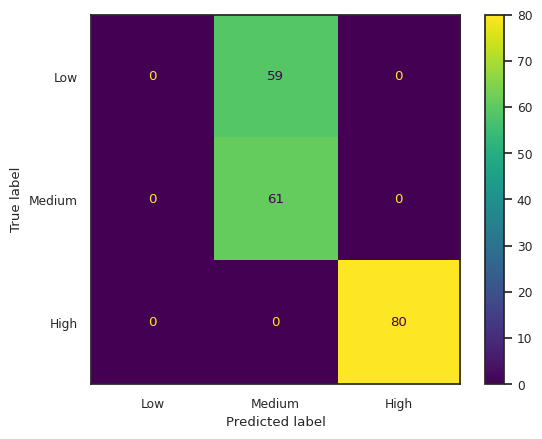

In [ ]:
perform(y_pred_ada)

In [ ]:
filename = 'Lung_Cancer_ADA.h5'
pickle.dump(model_ada, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


## Extra Trees Classifiers

In [ ]:
model_etc = ExtraTreesClassifier()
model_etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_etc = model_etc.predict(X_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[59  0  0]
 [ 0 61  0]
 [ 0  0 80]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

Extratrees-Confusion Matrix


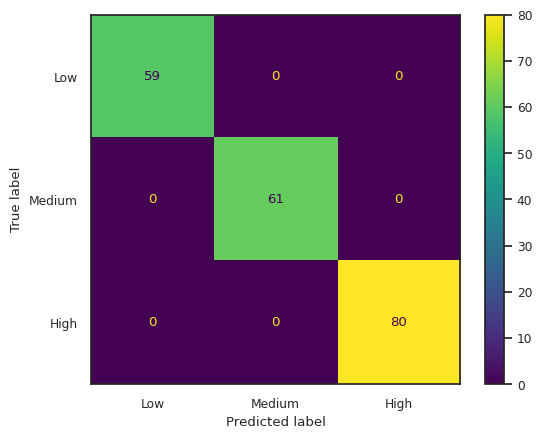

In [ ]:
perform(y_pred_etc)
plt.savefig(f"{images_dir}/ExtraTreesClassifier.jpeg")
print("Extratrees-Confusion Matrix")

In [ ]:
filename = 'Lung_Cancer_ETC.h5'
pickle.dump(model_etc, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


## Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
 y_pred_dt = model_dt.predict(X_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[59  0  0]
 [ 0 61  0]
 [ 0  0 80]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

DecisionTree-Confusion Matrix


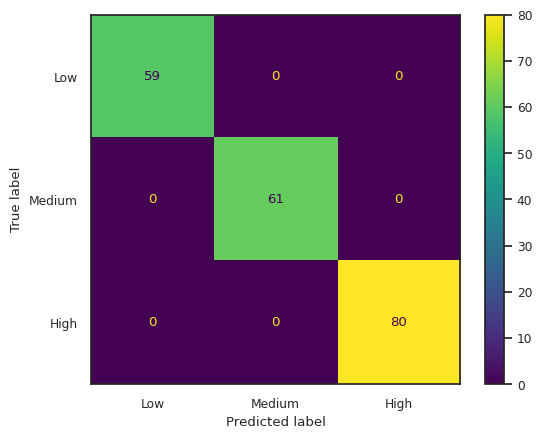

In [ ]:
perform(y_pred_dt)
plt.savefig(f"{images_dir}/DecisionTree.jpeg")
print("DecisionTree-Confusion Matrix")

In [ ]:
filename = 'Lung_Cancer_DT.h5'
pickle.dump(model_dt, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


### Decision Tree Visualization

In [ ]:
 feature_names = data.columns[0:23]
viz = data.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

Age                         float64
Gender                        int64
Air Pollution                 int64
Alcohol use                   int64
Dust Allergy                  int64
OccuPational Hazards          int64
Genetic Risk                  int64
chronic Lung Disease          int64
Balanced Diet                 int64
Obesity                       int64
Smoking                       int64
Passive Smoker                int64
Chest Pain                    int64
Coughing of Blood             int64
Fatigue                       int64
Weight Loss                   int64
Shortness of Breath           int64
Wheezing                      int64
Swallowing Difficulty         int64
Clubbing of Finger Nails      int64
Frequent Cold                 int64
Dry Cough                     int64
Snoring                       int64
Level                        object
dtype: object


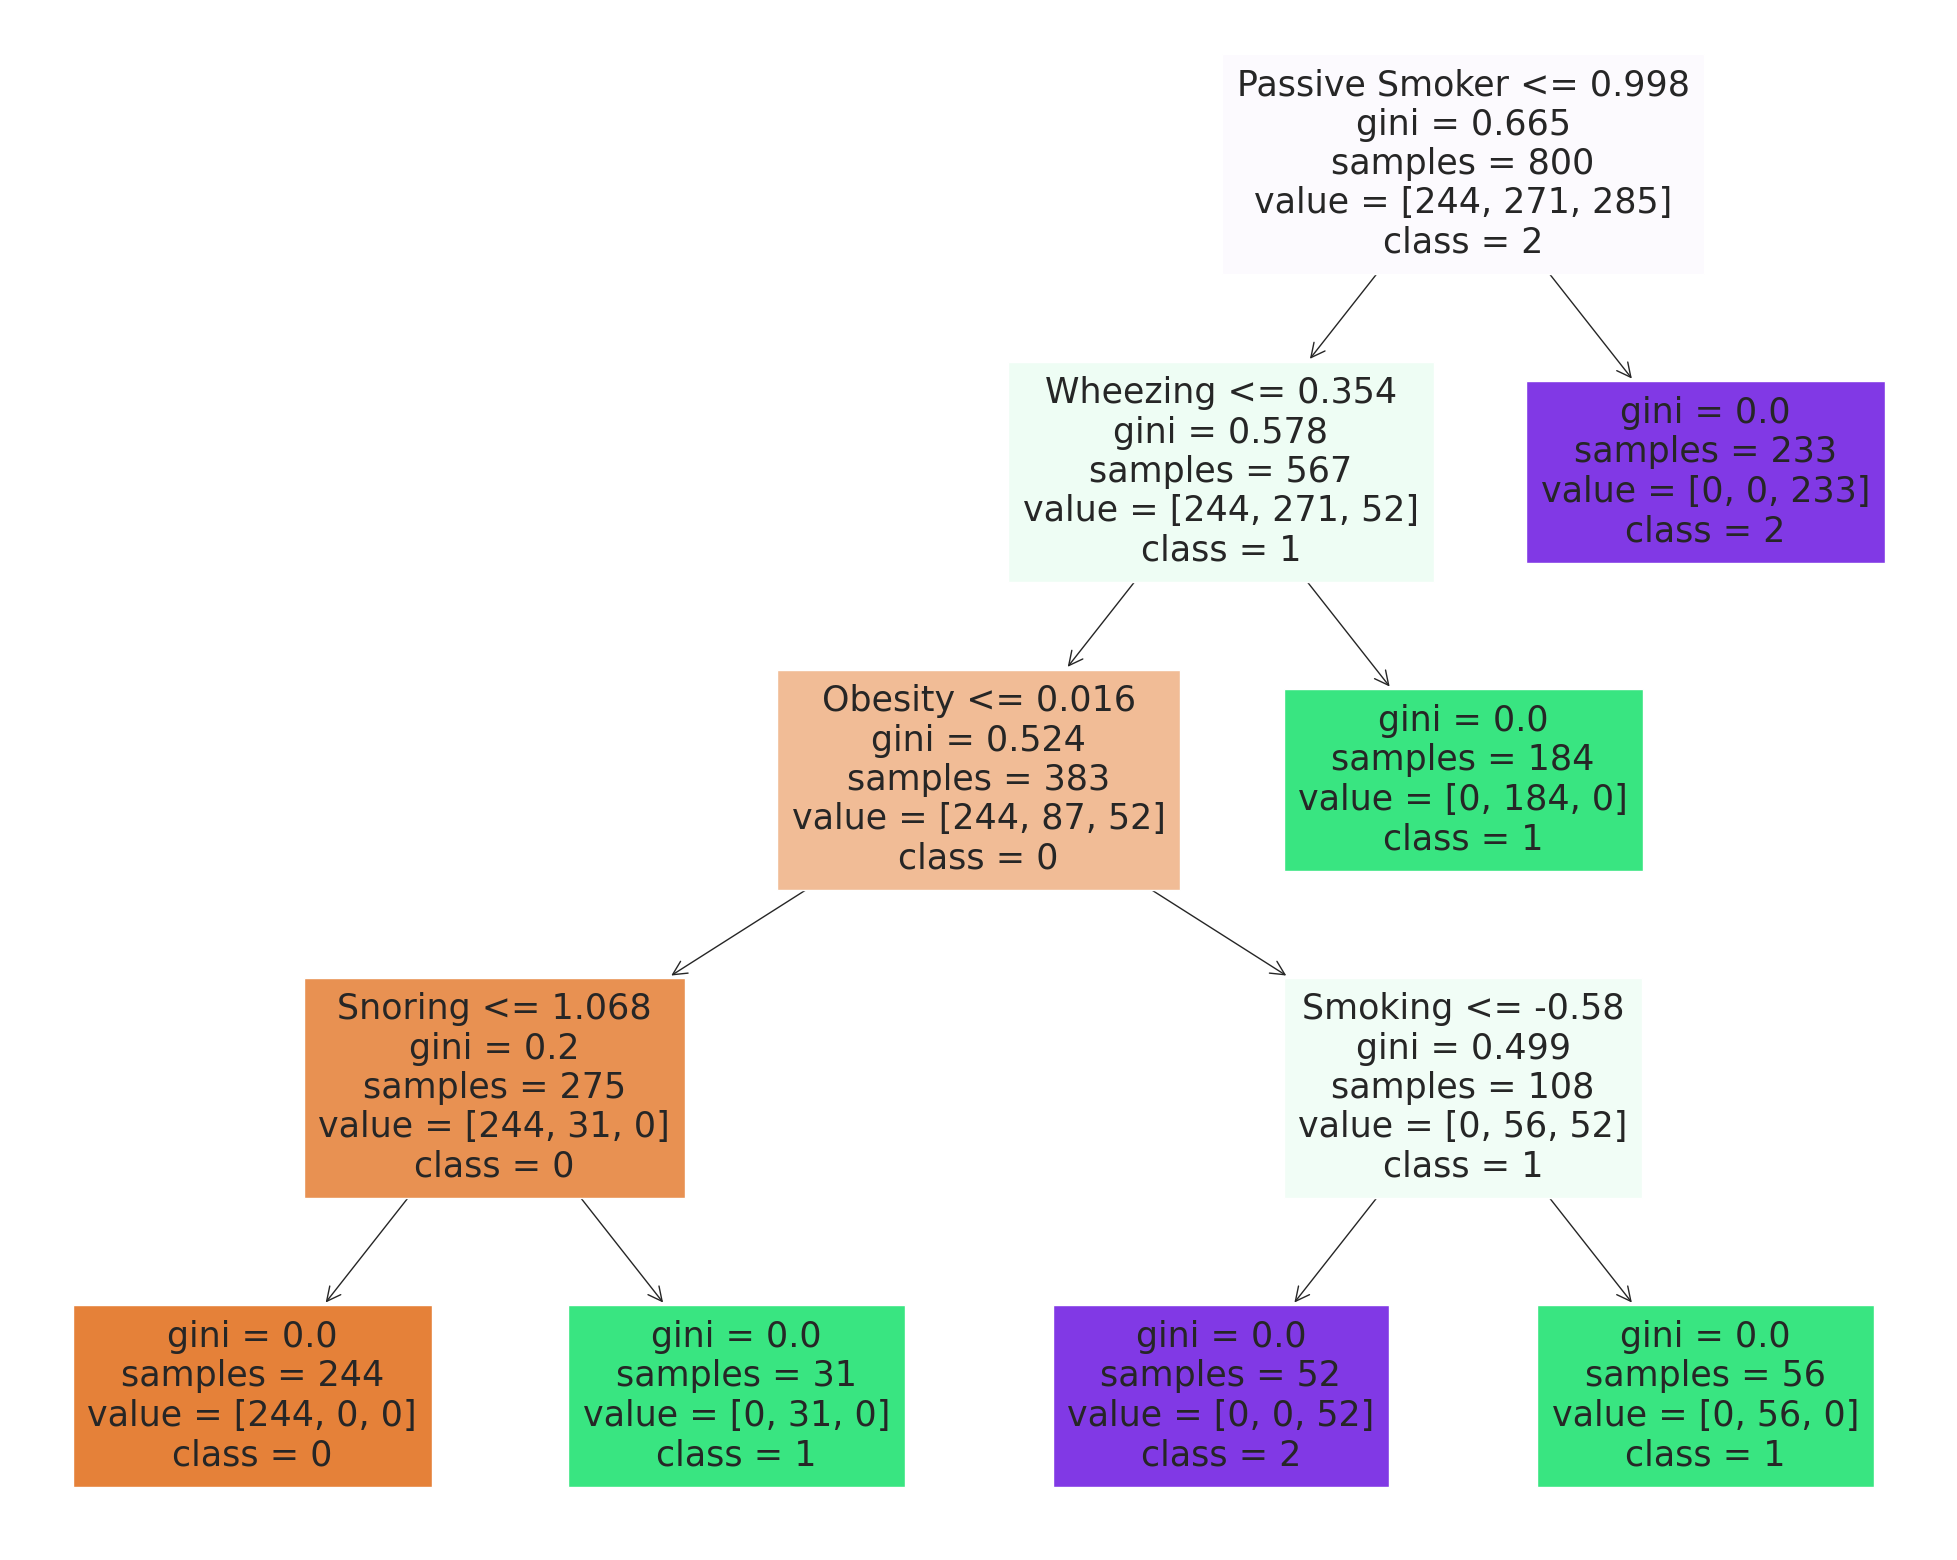

In [ ]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)
plt.savefig(f"{images_dir}/DecisionTree.jpeg")

In [ ]:
pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
import dtreeviz

viz_model = dtreeviz.model(model_dt,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Lung Cancer',
                           class_names=['Low', 'Medium', 'High'])

v = viz_model.view()     # render as SVG into internal object
v.save("Lung Cancer.svg")  # save as svg
plt.savefig(f"{images_dir}/Viz_model_view.jpeg")

<Figure size 640x480 with 0 Axes>

In [ ]:

#plt.savefig(f"{images_dir}/Viz_model_view.jpeg")

<Figure size 640x480 with 0 Axes>

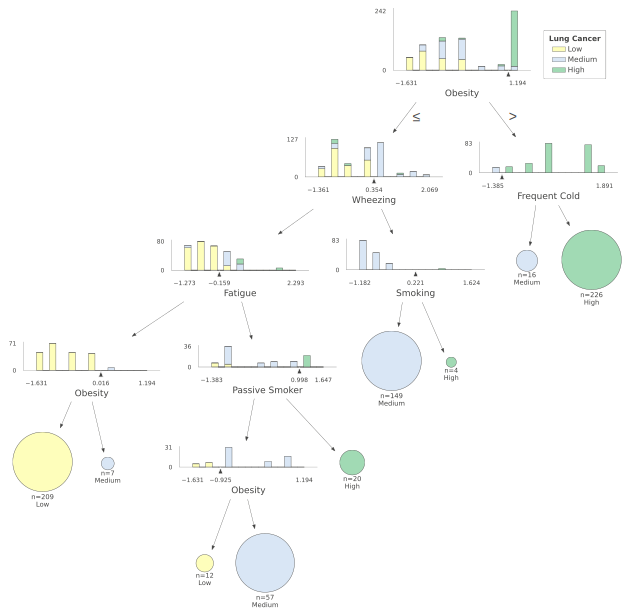

In [ ]:
#viz_model.view()

## Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(X_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[59  0  0]
 [ 0 61  0]
 [ 0  0 80]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

LogRegression-Confusion Matrix


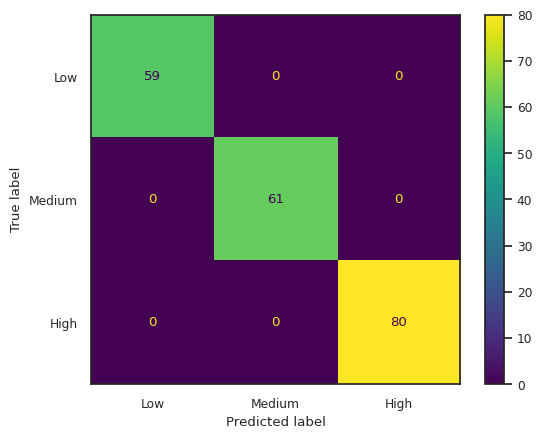

In [ ]:
perform(y_pred_lr)
plt.savefig(f"{images_dir}/LogisticRegression.jpeg")
print("LogRegression-Confusion Matrix")

In [ ]:
filename = 'Lung_Cancer_LR.h5'
pickle.dump(model_lr, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


## XGBoost Classifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[59  0  0]
 [ 0 61  0]
 [ 0  0 80]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

XGBoost-Confusion Matrix


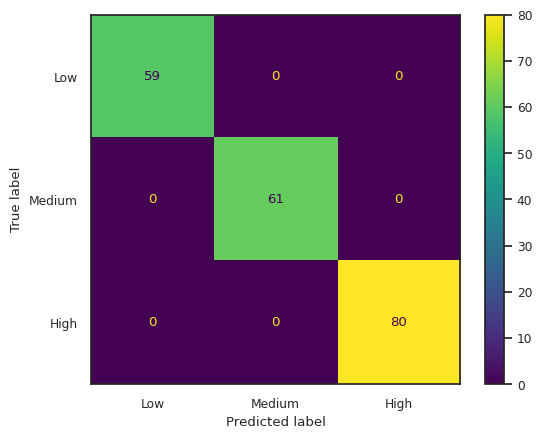

In [ ]:
perform(y_pred_xgb)
plt.savefig(f"{images_dir}/XGBoostClassifier.jpeg")
print("XGBoost-Confusion Matrix")

In [ ]:
filename = 'Lung_Cancer_XGB.h5'
pickle.dump(model_xgb, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_pred_mlp = model_mlp.predict(X_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[59  0  0]
 [ 0 61  0]
 [ 0  0 80]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

MLP-Confusion Matrix


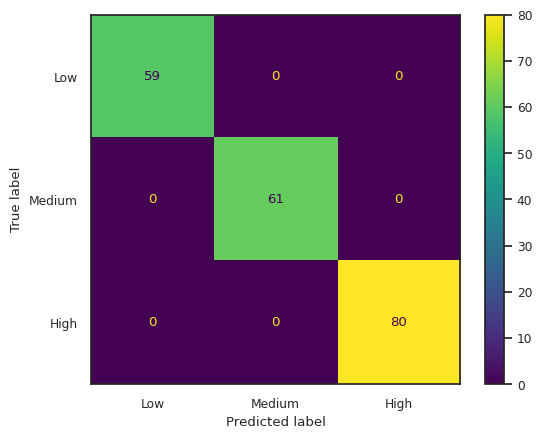

In [ ]:
perform(y_pred_mlp)
plt.savefig(f"{images_dir}/Multilayer_perceptron_classifier.jpeg")
print("MLP-Confusion Matrix")

In [ ]:
filename = 'Lung_Cancer_MLP.h5'
pickle.dump(model_mlp, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier


In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=3,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
#clear_output()

 97%|█████████▋| 28/29 [00:03<00:00,  5.17it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score -1.187444
[LightGBM] [Info] Start training from score -1.082493
[LightGBM] [Info] Start training from score -1.032123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

100%|██████████| 29/29 [00:04<00:00,  6.57it/s]


In [ ]:
models.sort_values(by="F1 Score",ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,0.51
KNeighborsClassifier,1.00,1.00,None,1.00,0.18
XGBClassifier,1.00,1.00,None,1.00,1.16
BaggingClassifier,1.00,1.00,None,1.00,0.07
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.03
LabelSpreading,1.00,1.00,None,1.00,0.13
LabelPropagation,1.00,1.00,None,1.00,0.13
LogisticRegression,1.00,1.00,None,1.00,0.06
RandomForestClassifier,1.00,1.00,None,1.00,0.32


In [ ]:
import plotly.express as px

In [ ]:
models_sorted = models.sort_values(by="F1 Score", ascending=False)

line = px.line(data_frame=models_sorted, y=["F1 Score"], markers=True)

line.update_xaxes(title="Model", rangeslider_visible=False)
line.update_yaxes(title="Accuracy")
line.update_traces(line_color="red")
line.update_layout(
    showlegend=True,
    title={
        'text': 'Accuracy vs Model',
        'y': 0.94,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

line.show()
plt.savefig(f"{images_dir}/Accuracy vs model.jpeg")

<Figure size 640x480 with 0 Axes>

HYPERPARAMETER TUNING

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: nan
Test F1 Score: 1.0


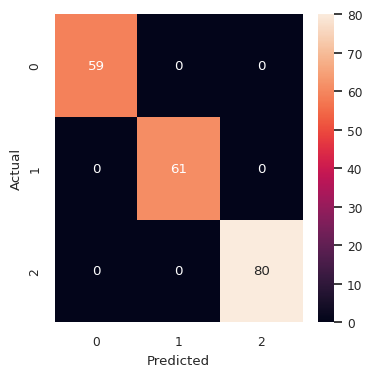

In [ ]:
ada_boost = RandomForestClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(ada_boost, param_grid, scoring='f1', cv=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average = 'micro')

confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Test F1 Score:", f1)

FEATURE IMPORTANCE

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(X, y)

RandomForestClassifier(random_state=7)

In [ ]:
importances = clf.feature_importances_
for feature, importance in zip(x, importances):
    print(feature, importance)

Age 0.005917720161021619
Gender 0.0004392311405913495
Air Pollution 0.027872955131174253
Alcohol use 0.059703720602869347
Dust Allergy 0.04409841851887125
OccuPational Hazards 0.03053958618340759
Genetic Risk 0.04628920998366105
chronic Lung Disease 0.02077018388574329
Balanced Diet 0.04444488677605995
Obesity 0.08398183183228858
Smoking 0.039358922018818826
Passive Smoker 0.10101265158820114
Chest Pain 0.030958033102656938
Coughing of Blood 0.11415275633059978
Fatigue 0.06798803351168238
Weight Loss 0.02225078033291997
Shortness of Breath 0.03850318099438283
Wheezing 0.07085557660696248
Swallowing Difficulty 0.039667644108614716
Clubbing of Finger Nails 0.026518415548104777
Frequent Cold 0.031488892809976646
Dry Cough 0.017147677446199917
Snoring 0.036039691385191336


In [ ]:
# Create a dataframe for feature importance
# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

                     Feature  Importance
13         Coughing of Blood        0.11
11            Passive Smoker        0.10
9                    Obesity        0.08
17                  Wheezing        0.07
14                   Fatigue        0.07
3                Alcohol use        0.06
6               Genetic Risk        0.05
8              Balanced Diet        0.04
4               Dust Allergy        0.04
18     Swallowing Difficulty        0.04
10                   Smoking        0.04
16       Shortness of Breath        0.04
22                   Snoring        0.04
20             Frequent Cold        0.03
12                Chest Pain        0.03
5       OccuPational Hazards        0.03
2              Air Pollution        0.03
19  Clubbing of Finger Nails        0.03
15               Weight Loss        0.02
7       chronic Lung Disease        0.02
21                 Dry Cough        0.02
0                        Age        0.01
1                     Gender        0.00


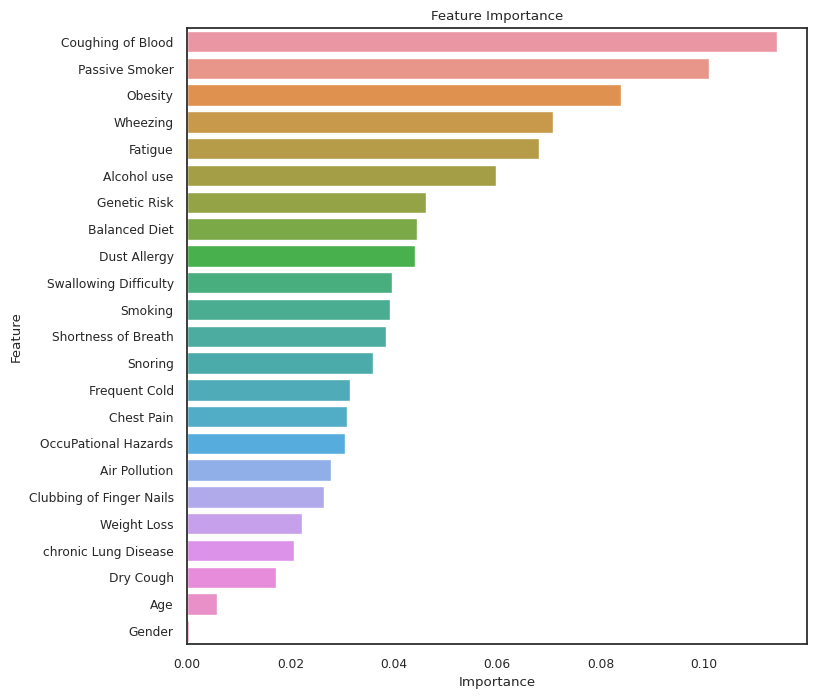

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
#plt.show()
plt.savefig(f"{images_dir}/FeatureImportance.jpeg")

 **Result interpretation**

The feature importance results provide insight into which features are most influential in predicting lung cancer using our Random Forest Model. The importance of a feature is calculated based on how much the tree nodes that use that feature reduce impurity across all trees in the forest.

The key findings show that coughing of blood is the most important feature in lung cancer followed by passive smoking, obesity and wheezing.

These results, however, should be interpreted with caution. The importance of a feature in a Random Forest model doesn't necessarily mean a casual relationship, and it is specific to this model and this dataset. Other models might find different results. Additionally, low importance doesn't mean that the feature is unimportant for predicting lung cancer in general, it may just mean that the feature is not useful in the presence of the other features. A thorough feature analysis should be considered for a better understanding of the contribution of each feature in the prediction.

